<img src="./img/HWNI_logo.svg"/>

# Lab A - Inferential Statistics

In [1]:
# makes our plots show up inside Jupyter
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import util.utils as utils
import util.shared as shared

shared.format_plots()
shared.format_dataframes()

In the previous lab, we considered *descriptive statistics*, or numbers we calculate from a dataset in order to describe that dataset. These numbers function primarily as summaries of our datasets, so that we can explain them without having to list every single data point we collected.

In this lab, we will consider *inferential statistics*, or numbers we calculate from a dataset in order to *infer*, or guess, a value that we don't know exactly. We often think of our guess as an *estimate*, and so the guess is called an *estimator*. After establishing the vocabulary of inference, we will work through an example of using different estimators to guess the same value. Then, we'll use a special statistic called a *confidence interval* to describe our uncertainty about the quality of our guess.

## Populations, Samples, and Inferences

The word *statistic* is ultimately derived from an expression that means *arithmetic of the state*. Historically, the entities organized enough and large enough to collect information at a scale that necessitated statistical methods were states -- in war, as [related by Thucydides in the 5th Century BC](https://books.google.com/books?id=yA6rCAAAQBAJ&pg=PA26&lpg=PA26), in taxation, and in census-taking. This history has left its mark on the words we use to describe statistical problems to this very day.

The goal of probability and statistics in applications is almost always *inference* -- drawing conclusions from limited data. In the endeavors of states, the problem of inference usually looks something like this: there is a collection of entities, be they subjects, soldiers, parcels of land, or units of goods. We call this collection the *population*. Each member of the population has an associated number or numbers: age, pay, crop yield, and weight, for example. These are called *random variables*, since they vary from individual to individual. There is a quantity summarizes the values of these random variables in the population, just as we had quantities to summarize our datasets in the previous labs. We call this quantity a *parameter* of the population.

These parameters are of great utility: we could use the variance of the crop yields to predict the variance of tax revenue across the country, or we could use the fraction of our subjects who are working-age males to predict how large an army we could conscript.

Unfortunately, collecting the actual values of these parameters is prohibitively expensive, time-consuming, and/or invasive, since we need to measure the data of interest for every member of the population -- the age of every man in France or the yield of every parcel of land in Northern Italy.

Instead, we collect a *random sample* from the population -- a subgroup of individuals, chosen at random -- and then we measure their associated data values. In the simplest case, we then calculate the parameter on this random sample (the average, the fraction that are between a certain value, etc.) and use this as a guess for, an estimate of, the true value of the parameter.

Of course, the value we calculate isn't always correct -- in fact, it should be different *every time we measure it*, since we choose our subgroup randomly each time -- but for many parameters we know that the value we estimate from taking random samples will, on average, be the correct value. Furthermore, thanks to a classic theorem of statistics known as the [*Law of Large Numbers*](https://en.wikipedia.org/wiki/Law_of_large_numbers), we know that, if our sample is large enough, the variability of our estimate around this average will go down.

Statistics is now often used in cases where there isn't an obvious "large population" that we "draw samples from". For example, our experiment may involve creating a genetic line of mice, measuring properties of every single mouse (often less than 10) and then inferring what the values of those properties would be if we were to keep generating more mice. Because of this, the term "sample" has somewhat fallen out of use outside of statistics proper, in favor of the term "dataset". However, the classical application of statistics to measuring extant populations of individuals via random sampling has given us the vocabulary that we use to describe our statistical procedures and the intellectual framework that we use to explain and motivate our inferences.

## Using Good Estimators

In the examples above, we calculated the value of a parameter on a sample in order to estimate its value in a population. This is called a *plug-in* estimator because we just "plug-in" our sample to the formula for the parameter. For example, we calculate the maximum of the sample to estimate the maximum of the population.

However, we needn't always do this. We can, in principle, use any value as an estimate of any other value. We could calculate However, when we infer or estimate parameters, we want our estimator to be good. In this section, we'll try to work out just what we mean by *good*.

As an example of different choices we can make when estimating parameters, let's focus on data that comes from a distribution where the mean and the median are in the same spot. Distributions like these have a "center", which is sometimes called the *location parameter*. 

If we estimate this center with the median or with the mean, the average value of our estimate, averaged over possible samples, is equal to the value of the center. An estimator that has this property is called an *unbiased* estimator. In some cases, an unbiased estimator for a parameter doesn't exist (we'll encounter this later, when we come to estimating model performance). Perhaps more surprisingly, there are often situations where the plug-in estimator is biased, and sitations where a biased estimator is a good choice. We'll be focusing on unbiased estimators for now.

Even if we restrict ourselves to unbiased estimators, we can think of estimators other than the sample mean or median. We could, for example, also take a sample, throw out all except the third number, and use that as our estimate for the center. This will also be an unbiased estimator -- averaged over possible samples, the average value of the third number is just the mean, which is the location of the center.

#### Q1 Can you think of some reasons why this is a bad estimator? Hint: will this value be closer to or further from the true value than the sample mean? How do you quantify "closeness"?

<font color='#1874CD'> ** There are a number of reasons you might think of. The key one from a mathematical perspective is that the variance, or average squared error, of this estimator will be higher than one that uses all of the numbers in the dataset.**

The definition of *efficiency* that most statisticians have agreed on as the right one for selecting between possible estimators is that the estimator is unbiased and has the smallest possible variance, or average squared error, where the average is taken over all possible samples that could be drawn from the population.

In this exercise, we'll investigate whether the mean or the median of the sample is a better choice for estimating the center of two populations with different distributions, using this criterion of efficiency.

Two distributions that have centers are the Gaussian, or Normal, distribution, and the Laplace distribution.

The Gaussian distribution, also known as the bell curve, is probably at least vaguely familiar. The importance of the Gaussian distribution is discussed below.

The [Laplace distribution](https://en.wikipedia.org/wiki/Laplace_distribution) is known for having a tendency to produce more outliers than a Gaussian distribution with the same variance. Take a look at the plot below, and try to convince yourself this is true.

A Laplace distribution might show up in neuroscience as the distribution of differences in inter-spike intervals for a neuron that uses firing rate, and not spike timing, to encode information. It also appears in the dimensionality reduction technique [Independent Component Analysis](https://en.wikipedia.org/wiki/Independent_component_analysis).

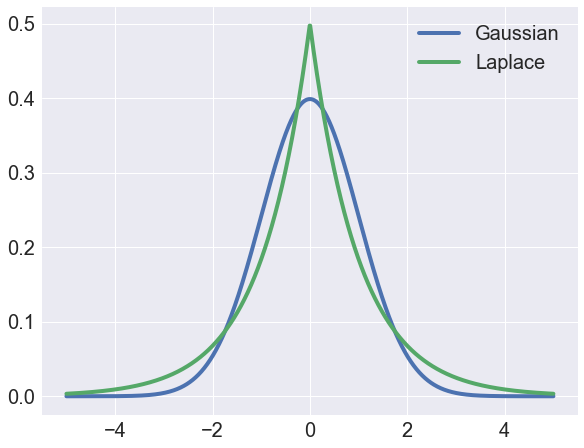

In [2]:
utils.plot_distributions()

Let's run some experiments to see how our two estimators, the sample mean and the sample median, perform on data drawn from these two distributions. Our experiments will involve drawing a sample of a given size, computing the mean and median. In a given experiment, we'll do this many times.

#### Programming Note: Documenting Functions

The `simulate_experiments` function takes three keyword arguments, `distribution`, `num_samples`, and `sample_size`. It returns two lists. A detailed description appears at the start of the function definition below. This is called a "docstring", and you can view it for any function at any time by running a code cell that contains `nameOfFunction?`. You might want to try this on `utils.draw_sample`, in case you're curious what that function does.

You can add a docstring to a function you wrote by including it, as I did below, between two sets of three quotation marks at the beginning of the function. This is good practice, even if you're the only one who ever uses a function, since it means that if you come back to it after months of not using it, you can quickly remember how it works.

In [3]:
def simulate_experiments(distribution='gauss', num_samples=2500, sample_size=5,):
    """
    draws random samples from the given distribution and calculates
     the mean and the median of those samples.
    
    Parameters
    ----------
    distribution : string, either 'gauss' or 'laplace'
    num_samples  : integer, number of random samples to draw
    sample_size   : integer, size of each random sample
    
    Returns
    -------
    sample_means   : numpy float array, means of each sample
    sample_medians : numpy float array, medians of each sample
    """
    
    sample_means = []; sample_medians = []
    samples = [utils.draw_sample(sample_size, distribution)
                   for ii in range(num_samples)]
    
    for sample in samples:
        sample_means.append(np.mean(sample))
        sample_medians.append(np.median(samples))
        
    return sample_means, sample_medians

The code cell below will use `simulate_experiments` to simulate the process of repeatedly collecting experimental data from a population distributed according to `distribution`. It will run `num_samples` experiments, collecting a sample of size `sample_size` each time. The means and medians of these samples are returned as `sample_means` and `sample_medians`. `utils.plot_experiments` then plots a histogram of the resulting means and medians.

Add some code that measures the average squared error of the two estimators and `print`s the result. The true value of the center is 0 for both distributions.

Average Squared Error for mean is: 0.8086988653755476
Average Squared Error for median is: 0.0003149184890863135


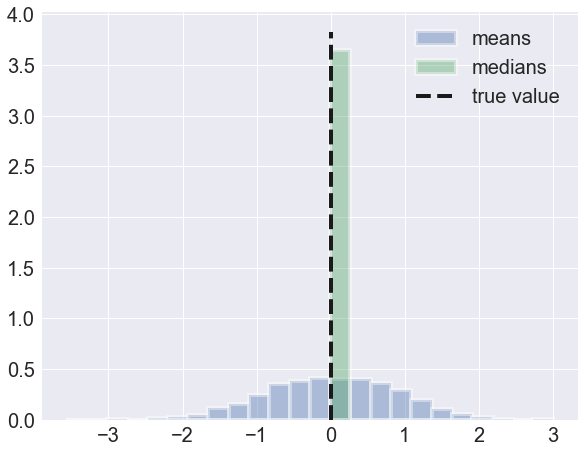

In [4]:
sample_means, sample_medians = simulate_experiments(distribution='gauss',
                                           num_samples=2500,
                                           sample_size=20,)

utils.plot_experiment(sample_means, sample_medians)

MSE_mean = np.mean(np.square(sample_means))
MSE_median = np.mean(np.square(sample_medians))

print("Average Squared Error for mean is: {}".format(MSE_mean))
print("Average Squared Error for median is: {}".format(MSE_median))

#### Q2 At a sample size of 5, which estimator is better, i.e., has lower error, for the Gaussian distribution? What about the Laplace distribution?

<font color='#1874CD'> **For the Gaussian, it is the mean. For the Laplace distribution, it's the median. **

Increase the `sample_size` to 50, and then 1000. 

#### Q3 What happens to the error? Does the best estimator stay the same?

<font color='#1874CD'> **The error goes down, but the best estimator stays the same.**

It's often said that the median is "robust to outliers". 

#### Q4 How does this connect to its performance as an estimator for the center of the Laplace distribution?

<font color='#1874CD'> ** The Laplace distribution produces lots of outliers that have a stronger effect on the mean than on the median.**

## Sampling Distributions

Notice that each time we collect a sample, we get a different answer for the mean and median. This is because the data we collect is different each time. In the classic view of statistics, this is because the sample is drawn at random, and so the mean and median "inherit" randomness. That is, because our data varies randomly from experiment to experiment, any number we calculate using our data, any *statistic* we compute, also varies randomly.

That means that the statistics that we calculate have a probability distribution, just like our data! The histograms above are estimates of those distributions, just as a histogram for our sample is an estimate of the data's distribution. One of the key goals in the academic discipline of statistics is to characterize the distributions of our statistics, which are called *sampling distributions*, as in *sampling distribution of the mean* and *sampling distribution of the p-value*. If we know how these distributions behave, then we can interpret the statistics we calculate and even design new ones!

Shockingly, a wide variety of statistics have a very simple form for their sampling distribution: it is very close to a Gaussian, and the location of its center and width can be estimated from the data. This is the content of the celebrated *Central Limit Theorem*, which states that if the statistic being calculated involves adding up a collection of data values, as in the cases of the mean and the variance, then the sampling distribution of the statistic becomes closer to a Gaussian as the size of the dataset increases. Check out the `Central Limit Theorem Demo` notebook to see some animations of sampling distributions of the sum changing as the sample size increases.

## Confidence Intervals

Because the outcome of the calculation of a statistic is a random variable subject to a distribution, we can't be certain that the value of the statistic that we compute from our sample is the true value -- in fact, we can often be certain that we're incorrect!

So instead of reporting a single value for the statistic, we need to report a range of values, also known as an *interval*. We'd like to choose a range such that it is very likely that this interval contains the true value, but we'd also like the interval to be as small as possible. Unfortunately, we can't guarantee that this interval of values contains the true value -- our interval is, after all, going to be calculated from our sample, so *it is itself a statistic* and therefore *it has a sampling distribution*.

If we're very clever, we can design our interval such that we know what its sampling distribution looks like -- so that we know what the distribution of intervals would be, were we to collect data for the same experiment many times and calculate the interval each time. 

Under this distribution, some of the intervals will contain the true value of the parameter, and some of them will not. We can calculate, *a priori*, the fraction of the intervals that do contain the true value. We call this our *level of confidence* in the interval. If, for example, the interval calculated from the data according to some procedure will contain the true value in 80% of the cases, we report that the true value is in that interval with confidence level 80%. Such an interval would be called an *80% confidence interval* for short.

As an example, it can be shown that, if the sampling distribution of the statistic is Gaussian, then we can construct a 95% confidence interval by setting the bounds to ±1.96 times the standard deviation of the sampling distribution of the statistic around the value we calculated from our sample. The phrase *standard deviation of the sampling distribution of the statistic* is a mouthful, so it is often abbreviated to *the standard error of the statistic*, for example *the standard error of the mean*.

### Testing the Performance of a Confidence Interval

One part of the cleverness necessary for building tight, valid confidence intervals is in making correct assumptions about the distribution of the data so that we can draw correct conclusions about the sampling distribution of the statistic. Therefore the validity and utility of confidence intervals depend critically on whether our assumptions about our data are true.

The code below will simulate a statistical procedure where we compute the mean of some Gaussian data, assume that the sampling distribution of the mean is Gaussian and that the population has the same standard deviation as our sample, and produce 95% confidence intervals as described above. Note that the standard error of the mean is equal to the standard deviation of the population divided by the square root of the sample size.

There are two cases when our assumption that the sampling distribution of the mean is Gaussian will be true or close to true. If two, or $N$, random variables have a Gaussian distribution, then their sum has a Gaussian distribution, so their average, which is just their sum divided by a number, also has a Gaussian distribution. 

#### Q5 What's the other case in which our assumption is close to true?

<font color='#1874CD'> ** If the datapoints are not Gaussian, then their sum (and therefore mean) is still approximately Gaussian if there are enough of them. This is the substance of the Central Limit Theorem. **

#### Q6 When will our assumption that the standard deviation of our sample is the standard deviation of the population be a good assumption?

<font color='#1874CD'> ** When we have a large sample size, our assumption is more valid. This is the substance of another important idea from statistics, the [Law of Large Numbers](https://www.youtube.com/watch?v=VpuN8vCQ--M).**

In [5]:
def compute_confidence_interval(dataset, standard_dev=None):
    """
    assuming the sample mean is normally distributed,
     compute a 95% confidence interval for the mean
    """
    
    # estimate mean
    mean = np.mean(dataset)
    
    # estimate standard error of the mean,
    #  aka standard deviation of the mean
    
    if standard_dev != None: #if we know the standard_dev
        # divide by sqrt N to get standard error
        standard_error = standard_dev/np.sqrt(len(dataset))
    else: #if we don't know the standard_dev
        # estimate it using
        standard_error = np.std(dataset, ddof=0)/np.sqrt(len(dataset))
    
    # assuming the mean is distributed as a Gaussian,
    #  use the ~2 standard deviations rule to make the 95% interval
    
    interval = [mean-1.96*standard_error, mean+1.96*standard_error]
    
    return interval

As before, we'll repeat this procedure many times, drawing many samples of the same size, and see how our statistic, the confidence interval, performs.

The code cell below will generate `num_samples` samples, each of size `sample_size`, and then calculate a confidence interval for the mean based on the assumptions above. It then plots those intervals as horizontal lines, with the result from each sample at a different vertical position. Intervals in red are those that fail to contain the true value of the parameter (here, 0).

Write your own code to take the intervals and calculate the fraction of intervals that contains the true value, 0. The intervals are returned as a "list of lists": `intervals[0]` is a single interval, and `intervals[0][0]` is the lower bound of that interval.

0.96


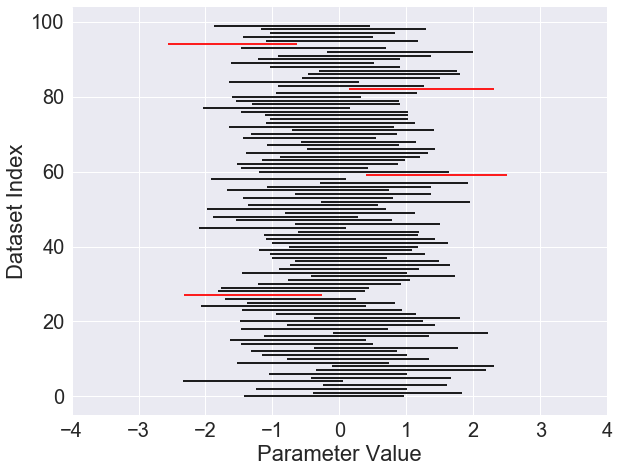

In [6]:
sample_size = 50
distribution = 'gauss'
num_samples = 100

datasets = [utils.draw_sample(sample_size, distribution) for _ in range(num_samples)]

intervals = [compute_confidence_interval(dataset, standard_dev=None) for dataset in datasets]

utils.plot_confidence_intervals(intervals, 0)

def compute_fraction(intervals, true_value):
    print(sum([interval[0] < true_value < interval[1] for interval in intervals])/len(intervals))

compute_fraction(intervals, 0)

Write a function to compute what fraction of the intervals contains the true parameter.

#### Q6 What value do you expect to see?

<font color='#1874CD'> ** I expect to see 0.95.**

Now, run this experiment many times and check.

#### Q7 is your result close to this value?

<font color='#1874CD'> ** It is! It has a very slight tendency to be less than 95% (the true confidence level is closer to 94%), because the standard deviation of the sample tends to be smaller than the true standard deviation.**

Decrease the `sample_size` to 5 and re-run the experiment above. 

#### Q8 What happens to the fraction of intervals that contain the true parameter? We made two assumptions about our data to make our confidence intervals. Which one is violated here?

<font color='#1874CD'> ** The fraction goes down. Our assumption that the standard deviation of the sample is close to the true value is now very incorrect, because our sample size is small. In fact, the sample standard deviation, even in its corrected form, is a biased estimator of the true value that tends to underestimate the population's true spread. This bias gets smaller quickly as the sample size goes up.  **

The true standard deviation of the data is 4. Add the keyword argument `standard_dev` with the value `4` to `compute_confidence_interval` -- that is, `compute_confidence_interval(dataset, standard_dev=4)`. This allows us to compute the confidence interval using the _true_ standard deviation of the population to get the _true_ standard error of the mean.

Run the experiment above as in **Q8**.

#### Q9 What happens to the fraction of intervals that contain the true parameter, as compared to the case where we don't know the true standard deviation?

<font color='#1874CD'> ** The fraction is now correct, as the intervals are slightly larger. **

Set the value of `standard_dev` back to `None`. Now, run experiments with `distribution` set to `laplace` and dataset sizes of 5 and 50. In one of these cases, the fraction of "95% confidence intervals" that contain the true parameter should not be as advertised.

#### Q10 Which case is it, and how are our assumptions is being violated?

<font color='#1874CD'> ** In the case where the dataset size is 5, our assumption that the sampling distribution is Gaussian is incorrect. Note that this assumption comes before the assumption that the standard deviation of that Gaussian sampling distribution (aka the standard error) is close to the standard deviation of the sample divided by $\sqrt{N}$. **

Imagine that each run of the simulation above is a single experiment,
say a test of the impact of a gene knockout on expression levels for 100 different RNAs.
In this case, our experimenter is particularly unlucky,
and none of the expression levels are in fact impacted by the knockout.

The experimenter uses confidence intervals to determine whether
the expression level is changed.
If the confidence interval does not contain $0$,
they conclude that the expression level has been changed by the knockout.
Assume that the data is distributed as a `gaussian`
and that the experimenter knows the true standard deviation.

#### Q11 What is the chance that the experimenter erroneously concludes *one RNA in particular* has its expression changed?

<font color='#1874CD'> ** The chance is only 0.05, since that is the fraction of confidence intervals that do no contain $0$. **

#### Q12 What is the chance that the experimenter erroneously concludes *at least one RNA* has its expression changed? Why is this answer different from, or the same as, your answer above?

<font color='#1874CD'> ** This chance is close to $1$. The fraction of confidence intervals that doesn't contain $0$ is almost always $0.05$, and in order for the experimenter to correctly decide that none of the RNAs had their expressions changed, that fraction would have to be $0$ sometimes. **
** This is the issue of *multiple comparisons*. Even though an individual test fails infrequently, when we perform multiple tests, the chance of making at least one error goes up very quickly.**

**Challenge Question**: Look up the *Student's $t$-distribution*, brought to prominence by Guinness' professional statistician WS Gossett in the early 1900s. What does this distribution have to do with the failure of our confidence intervals in the case of small sample sizes with unknown standard deviations?

<font color='#1874CD'> ** The $t$-distribution is used to get accurate confidence intervals in the case where the standard deviation of the population is unknown and the sample size is small. **